# Analysis of Car Data


## Information About Dataset

Data set imported from kaggle [Kaggle - US Cars Dataset](https://www.kaggle.com/datasets/doaaalsenani/usa-cers-dataset). Data scraped from Auction Export contains new and used vehicle data from 2019. 

## Data Cleaning and Preparation

In [85]:
__author__ = "Neal Kapur"
import pandas as pd 
import matplotlib.pyplot as plt
FILE_PATH: str = "../data/cars_data.csv"
df = pd.read_csv(FILE_PATH)

In [86]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [87]:
df = df.drop(["vin", "lot"], axis = 1).drop(df.columns[[0]], axis = 1)
df = df.rename(columns = {'condition': 'time_left'} )
df.head()

,price,brand,model,year,title_status,mileage,color,state,country,time_left
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,22 hours left


In [88]:
# Remove whitespace to better classify the textual columns
def remove_whitespace(df):
    """Automatically trim the columns of a dataframe."""
    for i in df.columns:
        if df[i].dtype == "object":
            df[i] = df[i].map(str.strip)
    return df 

In [89]:
df = remove_whitespace(df)
len(df[df["country"] != "usa"])
df.title_status.unique() # Only has Clean Vehicle or Salvage Title vehicles in dataset

array(['clean vehicle', 'salvage insurance'], dtype=object)

Generalized Notes
- 7 transactions occured outside of the United States (Canada).
- 163 transactions that do not have a clean title / salvaged title. 

In [90]:
title_breakdown = df.title_status.value_counts()
title_breakdown.index

Index(['clean vehicle', 'salvage insurance'], dtype='object')

### EDA of Columns 

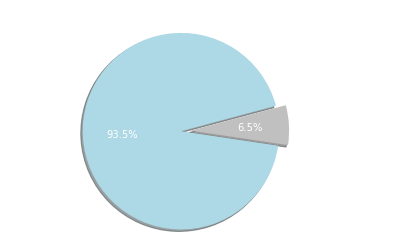

In [91]:
my_colors = ['lightblue', 'silver']
my_explode = (0, 0.1)
plt.pie(title_breakdown, labels = title_breakdown.index, autopct='%1.1f%%', startangle=15, shadow = True, colors = my_colors, explode=my_explode, textprops = {'color': 'w'})
plt.title('Title Status Breakdown', color = "white")
plt.axis('equal')
plt.show()

In [96]:
car_years = df.year.value_counts()
# Group the years into five year marks 
# Create a barchart of these five year 
years = [] 
for i in car_years.index:
    years.append(i)

In [170]:
# Start at 2020 iterate down 
def groupby_years(df, period_length = 5):
    """Create a barchart of five year marks """
    years = [] 
    for i in df.index:
        years.append(i)
    years.sort()
    start = max(years)
    result = {}
    sval = 0 
    n = period_length 
    i = 0 
    while i < len(years):
        if n == 0:
            result[f"{start}:{start + 5}"] = sval
            sval = 0 
            n = 5
        else:
            try: 
                sval += df[start]
                i += 1 
            except:
                sval += 0
            n -= 1
            start -= 1
    return result
    

In [171]:
result = groupby_years(car_years)
result

{'2015:2020': 1915,
 '2010:2015': 481,
 '2005:2010': 56,
 '2000:2005': 28,
 '1995:2000': 13,
 '1990:1995': 4,
 '1985:1990': 0,
 '1980:1985': 1,
 '1975:1980': 0}

Text(0, 0.5, 'Number of Cars')

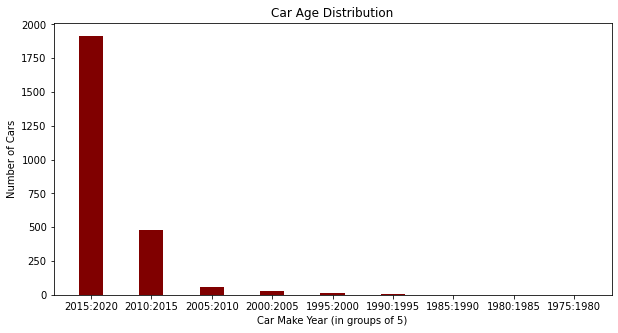

In [183]:
fig = plt.figure(figsize = (10, 5))
plt.bar(x = result.keys(), height = result.values(), color = "maroon", width = 0.4)
plt.title("Car Age Distribution")
plt.xlabel("Car Make Year (in groups of 5)")
plt.ylabel("Number of Cars")

In [176]:
result.values()

dict_values([1915, 481, 56, 28, 13, 4, 0, 1, 0])